## R12725049 Assignment2

### 1(a.) 試簡述何謂維度的詛咒？試列舉一案例說明。

- 隨著函數（或模型）所需要估計未知參數的增加，樣本所需要的數量會呈現指數型的成長，樣本數不足的情況容易發生不易收斂或多重解的可能性
- 如影像處理即可能面臨維度詛咒。一個800*600的彩色照片代表有1440000個變數。

### 1(b.) 避免維度詛咒的方法有哪些？

- 降低維度
- 在給定誤差的情況下滿足最少需要的樣本數
- 僅留下需要的Feature
- Clustering

### 1(c.)，試著重新繪製圖 3.12，呈現維度與預測

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df_winequality = pd.read_excel(r"./MDS_Assignment1_winequality.xlsx")

In [2]:
# 刪除重複值
df_winequality.drop_duplicates(inplace=True)

In [3]:
X_winequality = df_winequality.drop(columns=["quality"], axis=1) # 特徵
Y_winequality = df_winequality["quality"]# 標籤

In [4]:
import statsmodels.api as sm

X_winequality = sm.add_constant(X_winequality)

# 建立OLS model
model = sm.OLS(Y_winequality, X_winequality).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     70.02
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          5.83e-124
Time:                        20:06:34   Log-Likelihood:                -1356.8
No. Observations:                1359   AIC:                             2738.
Df Residuals:                    1347   BIC:                             2800.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.2379 

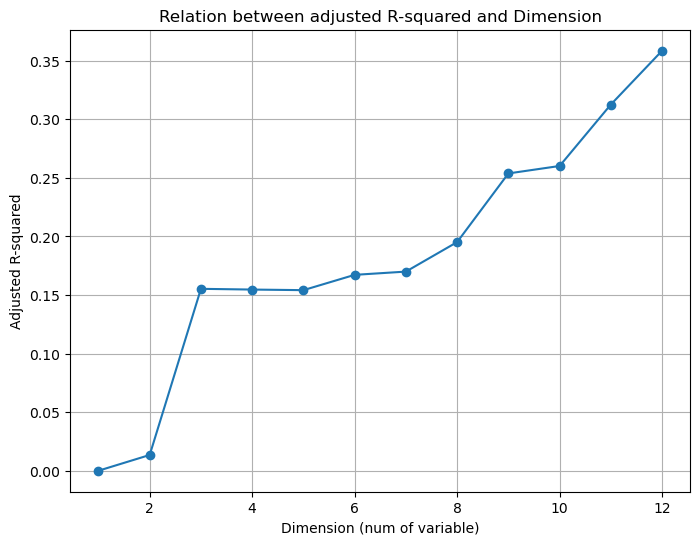

In [5]:
# Initial
num_variables = []  
adjusted_r_squared = []  

# 逐步增加變數個數
for num_vars in range(1, len(X_winequality.columns) + 1):
    
    selected_vars = X_winequality.iloc[:, :num_vars]
    selected_vars = sm.add_constant(selected_vars)

    # 建立OLS模型
    model = sm.OLS(Y_winequality, selected_vars).fit()

    # adjusted R-squared
    adj_r_squared = model.rsquared_adj

    # Recoed
    num_variables.append(num_vars)
    adjusted_r_squared.append(adj_r_squared)

# 繪圖
plt.figure(figsize=(8, 6))
plt.plot(num_variables, adjusted_r_squared, marker='o', linestyle='-')
plt.title("Relation between adjusted R-squared and Dimension")
plt.xlabel("Dimension (num of variable)")
plt.ylabel("Adjusted R-squared")
plt.grid(True)
plt.show()

### 1(d.)若準確度有或沒有明顯下降，請試著說明為什麼？

沒有明顯下降，應為維度還不夠多而數據量足夠龐大，導致還沒有達到最適特徵數量的頂峰

### 2(a.) 試說明損失函數與模型評估指標有何不同？

#### 模型訓練時使用損失函數，模型訓練後使用評估指標
- 損失函數
    - 訓練與配適模型時最小化的目標函數，作為調整模型複雜度與權衡偏誤與變異
    - 其函數特性常需要滿足一定的要求，例如具備「微分特性」、「連續性」等性質。通常只能比較相對性，無法解釋絕對的誤差大小
- 評估指標
    - 用以衡量訓練後的模型表現，評估最終結果，需具備「公平性」與「比較性」

### 2(b.)試使用網際網路(internet)學習，損失函數的設計有哪些？試列舉兩種，並說明其各自的優缺點或可建議的使用時機。

MSE與Log Loss是兩種常見的Loss Funtion
- MSE：常用於Lenear Regression的問題上
    - 優點：相對容易理解和計算，因為它具有可微分的圖形。
    - 缺點：對異常值不敏感，若誤差小於一，可能低估模型的不良程度。
- Log Loss：常用於Logistic Regression的問題上
    - 優點：非常適用於大量觀測數據，當觀測數量達到數千以上時，表現非常出色。
    - 缺點：不像MSE那樣容易解釋和計算，尤其在多分類問題中，且對異常值敏感。

### 3(a) 根據此開放數據，您會用什麼方法來確認資料品質的好壞？試操作一次並說明其細節。

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)

In [7]:
# 使用Pandas的read_excel函數讀取檔案
# 因沒有表頭所以先加入虛擬表頭
file_path = r"./MDS_Assignment2_kidney.xlsx"
df_kidney = pd.read_excel(file_path,sheet_name=0,header=None)
df_kidney

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
# 使用Pandas的read_excel函數讀取第二個Sheet做為表頭
df = pd.read_excel(file_path,sheet_name=1,usecols="D",header=None)
new_df = df[31:56]
new_df

,3
31,age
32,bp
33,sg
34,al
35,su
36,rbc
37,pc
38,pcc
39,ba
40,bgr


In [9]:
df_kidney.columns = new_df.T.values[0]

In [10]:
# 查看資料及概況
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     398 non-null    object
 16  wc      395 non-null    object
 17  rc      394 non-null    object
 18  htn     394 non-null    object
 19  dm      389 non-null    object
 20  cad     387 non-null    object
 21  appet   387 non-null    object
 22  pe      387 non-null    ob

**上述可看出每列的Data Type不盡正確**

In [11]:
# 查看資料內有多少空值與問號值
df_kidney.replace('?', np.nan, inplace=True)
df_kidney.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       72
wc       109
rc       134
htn        8
dm        13
cad       15
appet     14
pe        14
ane       14
class     13
dtype: int64

**上述檢查數據完整性，可看出幾乎每列都有空值，完整性不佳**

In [12]:
# cat to num:
columnsname=df_kidney.columns
# len(columnsname)
for i in range (0,25):
    print(columnsname[i],df_kidney[columnsname[i]].unique())

age [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
bp [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg [1.02  1.01  1.005 1.015   nan 1.025]
al [ 1.  4.  2.  3.  0. nan  5.]
su [ 0.  3.  4.  1. nan  2.  5.]
rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
bgr [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 1

In [13]:
df_kidney['dm'] = df_kidney['dm'].replace(to_replace={' yes':'yes'})

**上述檢查每個欄位的獨特質是否有不合理的值出現**

In [14]:
# 將欄位分為numerical以及categorical以便後續處理
columns = df_kidney.columns
columns_numerical = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
columns_categorical = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

# Change Data Type
df_kidney[columns_numerical] = df_kidney[columns_numerical].apply(pd.to_numeric, errors='coerce')

In [15]:
df_kidney.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,328.000000,291.000000,266.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.871951,8425.773196,4.695865
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.000955,2949.586003,1.009624
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,6.500000


**上述檢查數據準確性、一致性，可看出某些數值有明顯的outliers**

In [16]:
# 查看資料及概況
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     328 non-null    float64
 16  wc      291 non-null    float64
 17  rc      266 non-null    float64
 18  htn     392 non-null    object 
 19  dm      387 non-null    object 
 20  cad     385 non-null    object 
 21  appet   386 non-null    object 
 22  pe

### 3(b)試建議三個可能衡量數據品質的量化指標(i.e. KPIs)

1. Error Rate：數據中錯誤值的比例，用以衡量Data Accuracy
2. Missing Value Ratio：數值中遺漏值的百分比，用以衡量Data Completeness
3. Duplicate Data Ratio：數值中重複資料的比例，用以衡量Data Consistency

### 3(c)如何處理遺漏值(missing values)？又或某些欄位不打算遺漏值處理的理由為何？

In [17]:
print("Atribut Numerical: {}".format(columns_numerical))
print("Atribut Categorical: {}".format(columns_categorical))
print("Panjang Atribut Numerical dan Categorical: {}".format(len(columns_numerical)+len(columns_categorical)))

Atribut Numerical: ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
Atribut Categorical: ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
Panjang Atribut Numerical dan Categorical: 25


In [18]:
# change df classficication to 0 and 1
df_kidney['class'] = df_kidney['class'].replace(to_replace={'ckd':1, 'notckd':0})

In [19]:
print("Dataset Original")
display(df_kidney)
nan_values = df_kidney[columns_categorical].isnull().sum()

simpleImputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_kidney[columns_categorical] = simpleImputer.fit_transform(df_kidney[columns_categorical])

print("利用SimpleImputer填補類別欄位空值")
display(df_kidney)

encoder = LabelEncoder()
df_kidney[columns_categorical] = df_kidney[columns_categorical].apply(encoder.fit_transform)

print("利用LabelEncoder為字串的類別欄位編碼")
display(df_kidney)

imputer = KNNImputer(n_neighbors=5)
df_kidney[columns_numerical] = imputer.fit_transform(df_kidney[columns_numerical])

print("利用KNN填補數值欄位空值")
display(df_kidney)


Dataset Original


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1.0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1.0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1.0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,0.0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,0.0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,0.0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,0.0


利用SimpleImputer填補類別欄位空值


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1.0
1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1.0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1.0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1.0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,0.0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,0.0
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,0.0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,0.0


利用LabelEncoder為字串的類別欄位編碼


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3,1,0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,3,4,0,1,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,0,0,0,1
2,62.0,80.0,1,2,3,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,1,0,1,1
3,48.0,70.0,0,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,3,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,42.0,70.0,4,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,12.0,80.0,3,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,17.0,60.0,4,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,0


利用KNN填補數值欄位空值


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3,1,0,1,1,0,0,121.0,...,44.0,7800.0,5.20,1,1,0,0,0,0,1
1,7.0,50.0,3,4,0,1,1,0,0,113.0,...,38.0,6000.0,4.96,0,0,0,0,0,0,1
2,62.0,80.0,1,2,3,1,1,0,0,423.0,...,31.0,7500.0,3.80,0,1,0,1,0,1,1
3,48.0,70.0,0,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.90,1,0,0,1,1,1,1
4,51.0,80.0,1,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.60,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,3,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.90,0,0,0,0,0,0,0
396,42.0,70.0,4,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.20,0,0,0,0,0,0,0
397,12.0,80.0,3,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.40,0,0,0,0,0,0,0
398,17.0,60.0,4,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.90,0,0,0,0,0,0,0


### 4(a.) 若要建構線性迴歸或羅吉斯迴歸分析，如何處理某些類別或名目尺度的欄位？

#### 在3(c.)的程式碼中已對類別或名目尺度的欄位做處理，將字串轉為1/0的編碼來表示

### 4(b) 試將羅吉斯迴歸分析的結果呈現如下表，並試著解釋任一特徵與目標值之間的關係。

In [20]:
import statsmodels.api as sm

# 定义目标值和特征变量
y = df_kidney["class"]
X = df_kidney.drop("class", axis=1)

# 添加截距（intercept）
X = sm.add_constant(X)

# 使用Logit执行逻辑回归
model = sm.Logit(y, X)
result = model.fit()

# 获取摘要报告
summary = result.summary()

# 打印摘要报告
print(summary)

# 获取R-squared和Adjusted R-squared值
r_squared = result.prsquared
adjusted_r_squared = result.rsquared_adj
print(f"R-squared: {r_squared}, Adjusted R-squared: {adjusted_r_squared}")

         Current function value: inf
         Iterations: 35


C:\Users\tiger\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\tiger\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

y=df_kidney["class"].values
x=df_kidney.drop(["class"],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

# lr = LogisticRegression()
# lr.fit(x_train,y_train)

# # 获取系数
# coefficients = lr.coef_[0]
# intercept = lr.intercept_

# # 打印系数
# print("Intercept (截距):", intercept)
# for feature, coef in zip(x.columns, coefficients):
#     print(f"{feature}: {coef}")

# score = lr.score(x_test,y_test)*100
# algorithms.append("Logistic Regression")
# print("test accuracy {}".format(lr.score(x_test,y_test)))

# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# y_pred=lr.predict(x_test)
# y_true=y_test
# cm=confusion_matrix(y_true,y_pred)

# #Confusion Matrix on Heatmap
# f,ax=plt.subplots(figsize=(5,5))
# sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
# plt.xlabel("y_pred")
# plt.ylabel("y_true")
# plt.title("Logistic Regression Confusion Matrix")
# plt.show()

---
## Reference

- https://www.kaggle.com/code/mohannapd/99-accuracy-for-ckd-prediction/comments
- https://www.kaggle.com/code/yudhaislamisulistya/kidney-disease-knn-nbc-dt
- https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial
- 課堂講義